In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
file_names = []
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        file_names.append(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/disasters-on-social-media/socialmedia-disaster-tweets-DFE.csv


In [2]:
#Import the necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
#Set the seed value
SEED = 4243

In [4]:
#Read the sample file
sample = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")
sample.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [5]:
#Read the training data
train = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
#Read the Disaster on Socila Media dataset
test = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
train2 = pd.read_csv("/kaggle/input/disasters-on-social-media/socialmedia-disaster-tweets-DFE.csv")
train2.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid
0,778243823,True,golden,156,NaN,Relevant,1.0000,Relevant,NaN,NaN,Just happened a terrible car crash,1.0,NaN
1,778243824,True,golden,152,NaN,Relevant,1.0000,Relevant,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,13.0,NaN
2,778243825,True,golden,137,NaN,Relevant,1.0000,Relevant,NaN,NaN,"Heard about #earthquake is different cities, s...",14.0,NaN
3,778243826,True,golden,136,NaN,Relevant,0.9603,Relevant,NaN,NaN,"there is a forest fire at spot pond, geese are...",15.0,NaN
4,778243827,True,golden,138,NaN,Relevant,1.0000,Relevant,NaN,NaN,Forest fire near La Ronge Sask. Canada,16.0,NaN


In [8]:
train2.head(2)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid
0,778243823,True,golden,156,NaN,Relevant,1.0,Relevant,NaN,NaN,Just happened a terrible car crash,1.0,NaN
1,778243824,True,golden,152,NaN,Relevant,1.0,Relevant,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,13.0,NaN


## EDA of Original dataset

In [9]:
#Define the label
TARGET = "target"

In [10]:
#Define a function to plot he Null values in a given DataFrame
def plot_null_values(df):
    print("Total number of samples in the data =",df.shape[0])
    sns.heatmap(df.isnull().sum().to_frame(),
                annot=True,
                fmt="d",
                cmap="crest"
                )
    plt.title("Heatmap of NULL values")

				NULL values in Train Dataset
Total number of samples in the data = 7613


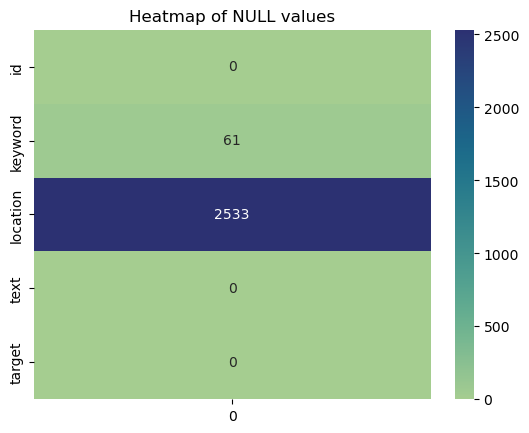

In [11]:
#Use the plot_null_values function to plot Null values in the train dataset
print("\t\t\t\tNULL values in Train Dataset")
plot_null_values(train)

				NULL values in Test Dataset
Total number of samples in the data = 3263


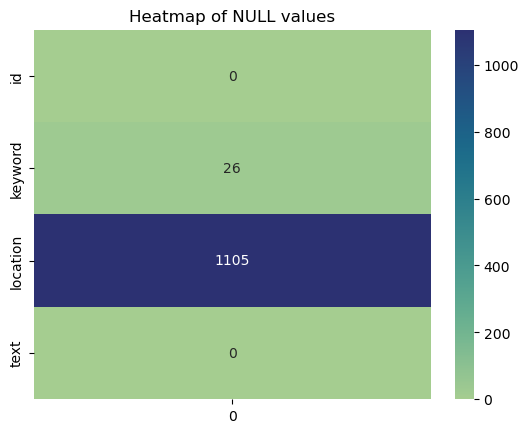

In [12]:
#Use the plot_null_values function to plot Null values in the test dataset
print("\t\t\t\tNULL values in Test Dataset")
plot_null_values(test)

In [13]:
#Replace the Null values with str(0)
train.fillna("0",inplace=True)
test.fillna("0",inplace=True)

				NULL values in Train Dataset
Total number of samples in the data = 7613


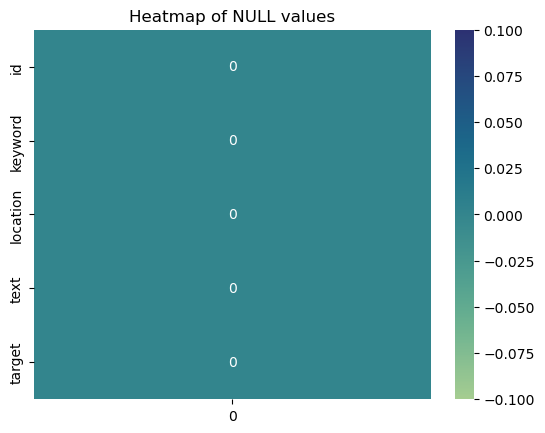

In [14]:
#Check the updated train dataset
print("\t\t\t\tNULL values in Train Dataset")
plot_null_values(train)

				NULL values in Test Dataset
Total number of samples in the data = 3263


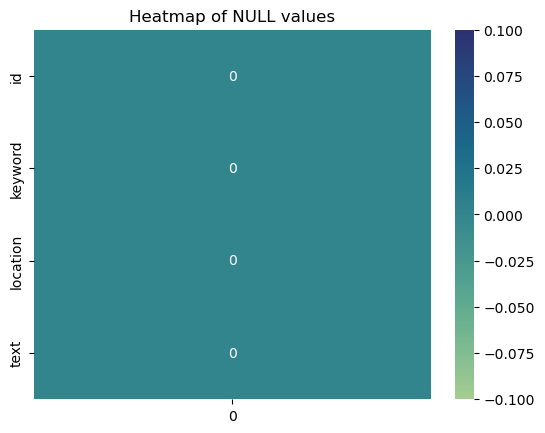

In [15]:
#Check the updated test dataset
print("\t\t\t\tNULL values in Test Dataset")
plot_null_values(test)

In [16]:
#Check for duplicate values
train[train.duplicated()]

,id,keyword,location,text,target


**It is evident that there are no repeated tweets in our dataset.**

## Target Analysis

To assess the balance of our data, let's examine the distribution of values in the "target" column.

Text(0.5, 1.0, 'Distribution of target values')

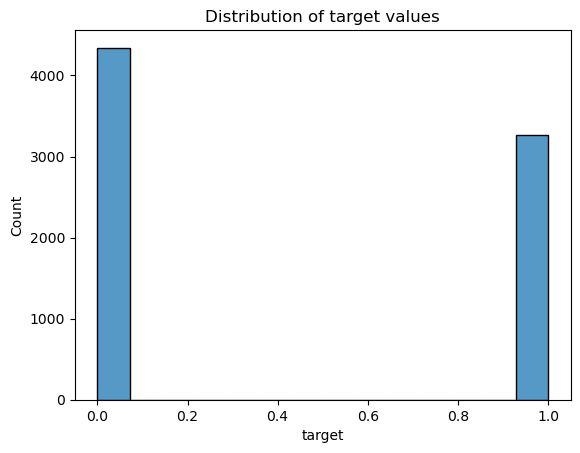

In [17]:
#Target analysis
sns.histplot(x=train[TARGET])
plt.title("Distribution of target values")

## Feature Analysis

Let's examine the distribution of features.

In [18]:
#Group the train DataFrame by "keyword" column and
# count the "target" Series group values
keyword = train.groupby("keyword")["target"].count()

#Convert the above Groupby Object to DataFrame and sort the values
keyword_df = pd.DataFrame(data={"keyword":keyword.index, "count":keyword.values}).sort_values(by=["count"],ascending=False)
keyword_df

,keyword,count
0,0,61
105,fatalities,45
64,deluge,42
9,armageddon,42
178,sinking,41
...,...,...
116,forest%20fire,19
95,epicentre,12
195,threat,11
135,inundation,10


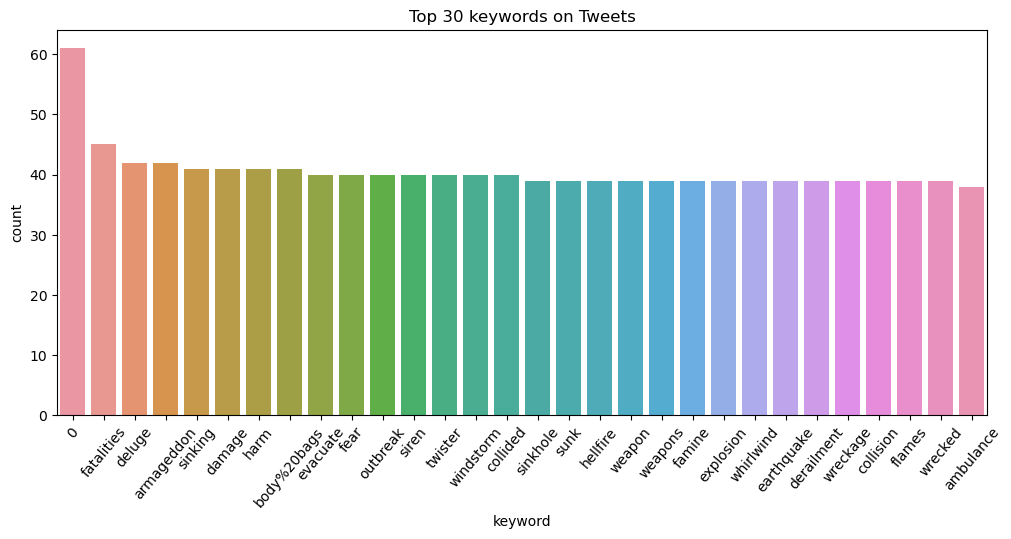

In [19]:
#Let's plot the "key" DataFrame
plt.figure(figsize=(12,5))
#Limit the data to top 30 keywords by .head() method
sns.barplot(data=keyword_df.head(30), x = 'keyword',y = 'count')
plt.xticks(rotation = 50)
plt.ylabel('count')
plt.title('Top 30 keywords on Tweets');

In [20]:
#Group the train DataFrame by "keyword" column and
# count the "target" Series group values
location = train.groupby("location")["target"].count()

#Convert the above Groupby Object to DataFrame and sort the values
location_df = pd.DataFrame(data={"location":location.index, "count":location.values}).sort_values(by=["count"],ascending=False)
location_df

,location,count
80,0,2533
2644,USA,104
1827,New York,71
2663,United States,50
1507,London,45
...,...,...
1199,Hueco Mundo,1
1200,"Hughes, AR",1
1201,"Huntington, WV",1
1202,"Huntley, IL",1


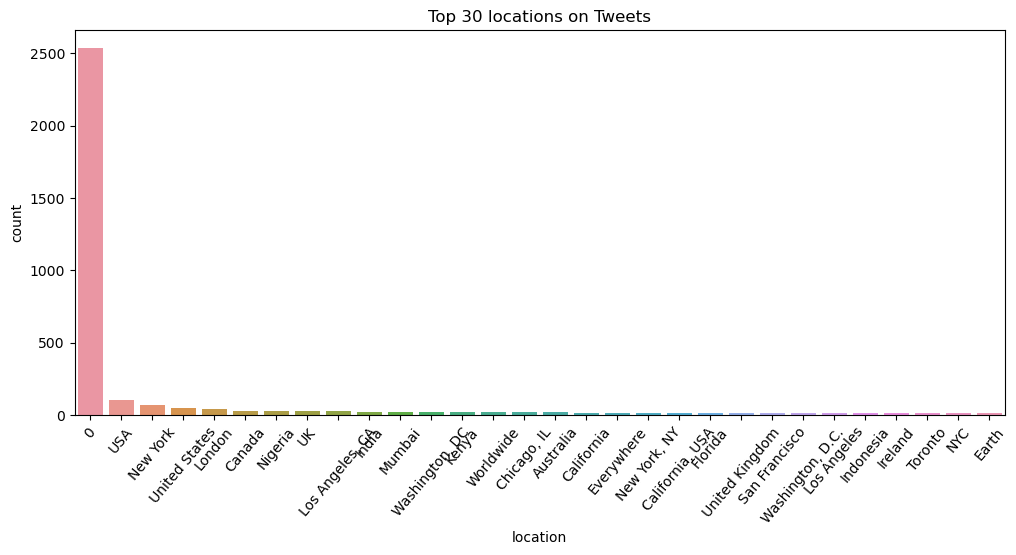

In [21]:
#Let's plot the "location" DataFrame
plt.figure(figsize=(12,5))

#Limit the data to top 30 locations by .head() method
sns.barplot(data=location_df.head(30), x = 'location',y = 'count')
plt.xticks(rotation = 50)
plt.ylabel('count')
plt.title('Top 30 locations on Tweets');

**The "0" location used in place of "Null" values have distorted the view of location distribution. Let's plot the distribution without "0" value**

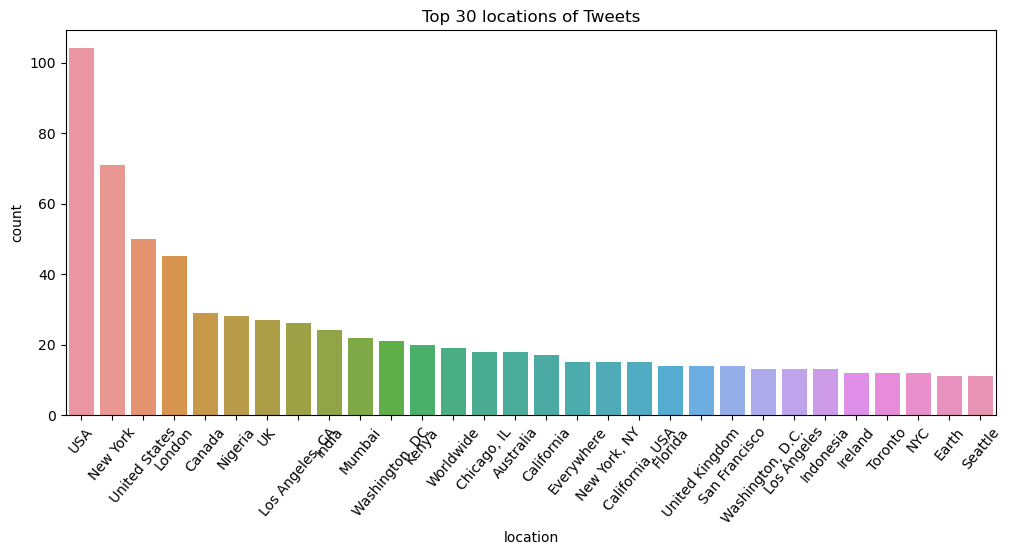

In [22]:
#Let's plot the "location" DataFrame with "0" discarded
plt.figure(figsize=(12,5))

#Limit the data to top 30 locations by .head() method
# and use the iloc to discard "0"
sns.barplot(data=location_df.head(31).iloc[1:,:], x = 'location',y = 'count')
plt.xticks(rotation = 50)
plt.ylabel('count')
plt.title('Top 30 locations of Tweets');

In [23]:
#Define a function to get the maximum length of words in each column
def check_max_length_sentence(df):
    max_length = 0
    for text in df["text"]:
        if len(text.split()) > max_length:
            max_length = len(text.split())
    print("Maximum length of Text column is:",max_length)
    
    max_length = 0
    for text in df["location"]:
        if len(text.split()) > max_length:
            max_length = len(text.split())
    print("Maximum length of Location column is:",max_length)
    
    max_length = 0
    for text in df["keyword"]:
        if len(text.split()) > max_length:
            max_length = len(text.split())
    print("Maximum length of Keyword column is:",max_length)

In [24]:
#Maximum lengths of columns in train data
check_max_length_sentence(train)

Maximum length of Text column is: 31
Maximum length of Location column is: 10
Maximum length of Keyword column is: 1


In [25]:
#Maximum lengths of columns in test data
check_max_length_sentence(test)

Maximum length of Text column is: 31
Maximum length of Location column is: 8
Maximum length of Keyword column is: 1


**Relying solely on the length of tweets doesn't provide a comprehensive understanding. To gain a better perspective on the maximum length required for vectorization, let's examine the distribution of tweet lengths.**

In [26]:
def get_sentence_lengths(df):
    df2 = pd.DataFrame(columns=["length"])
    i = 0
    for text in df["text"]:
        df2.loc[i,"length"] = len(text.split())
        i+=1
    return df2

def plot_sentence_lengths(df):
    lengths_df = get_sentence_lengths(df)
    bins = range(0,40,2)
    plt.hist(lengths_df["length"], bins=bins,alpha=0.3)
    #sns.countplot(data=lengths_df, x="length")
    plt.title("Distribution of sentence lengths")

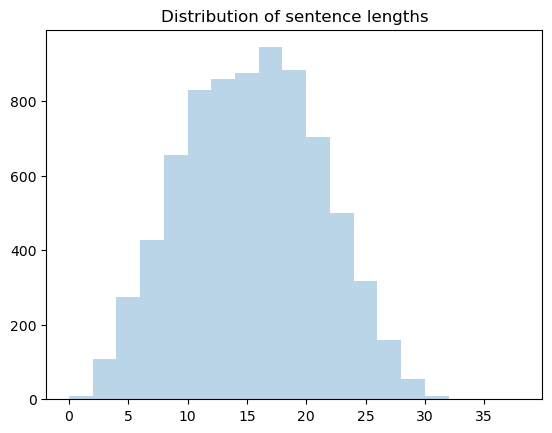

In [27]:
#Use the plot_sentence_lengths function on train dataset
plot_sentence_lengths(train)

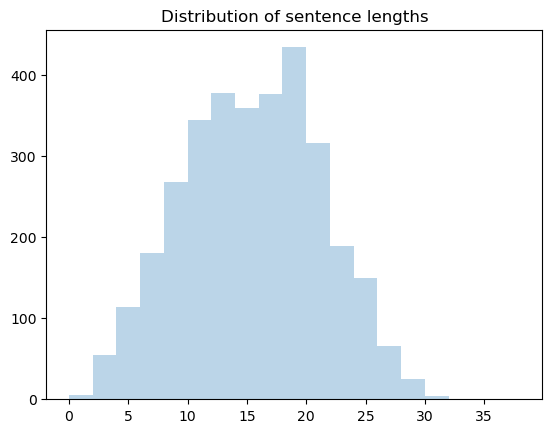

In [28]:
#Use the plot_sentence_lengths function on test dataset
plot_sentence_lengths(test)

## Analyze the Disaster on Social Media dataset

In [29]:
#Extract the part relevant columns
train2s = train2[["keyword","location","text","choose_one"]].copy()
train2s

,keyword,location,text,choose_one
0,NaN,NaN,Just happened a terrible car crash,Relevant
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,Relevant
2,NaN,NaN,"Heard about #earthquake is different cities, s...",Relevant
3,NaN,NaN,"there is a forest fire at spot pond, geese are...",Relevant
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,Relevant
...,...,...,...,...
10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,Relevant
10872,NaN,NaN,Police investigating after an e-bike collided ...,Relevant
10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,Relevant
10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,Relevant


In [30]:
#Check for the Null values
train2s.isnull().sum()

keyword         87
location      3638
text             0
choose_one       0
dtype: int64

Total number of samples in the data = 10876


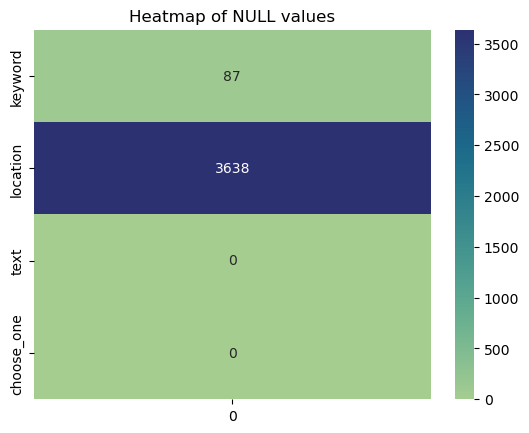

In [31]:
#For a better understanding, let's see the plot of Null values
plot_null_values(train2s)

Total number of samples in the data = 10876


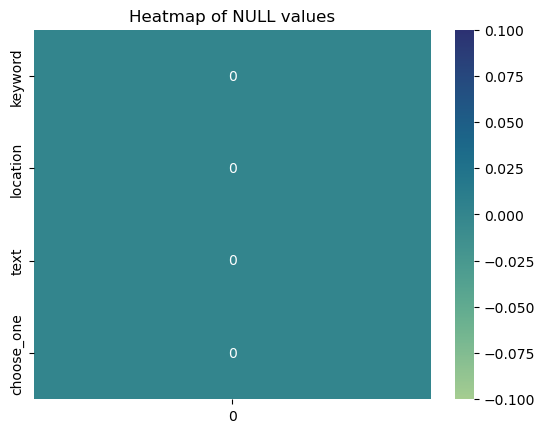

In [32]:
#Fill the Null values with str(0)
train2s.fillna("0",inplace=True)

#Check for te Null values
plot_null_values(train2s)

### Target Analysis of Disaster on Social Media dataset

In [33]:
#Renname the "choose_one" column as "text"
train2s.rename(columns={"choose_one":"target"},inplace=True)
train2s.head()

,keyword,location,text,target
0,0,0,Just happened a terrible car crash,Relevant
1,0,0,Our Deeds are the Reason of this #earthquake M...,Relevant
2,0,0,"Heard about #earthquake is different cities, s...",Relevant
3,0,0,"there is a forest fire at spot pond, geese are...",Relevant
4,0,0,Forest fire near La Ronge Sask. Canada,Relevant


In [34]:
#Unique values in the target column
train2s["target"].unique()

array(['Relevant', 'Not Relevant', "Can't Decide"], dtype=object)

In [35]:
#Count the unique values in the target column
target_count = train2s["target"].value_counts()
target_count_df = pd.DataFrame(data={"target_category":target_count.index, "count":target_count.values})
target_count_df

,target_category,count
0,Not Relevant,6187
1,Relevant,4673
2,Can't Decide,16


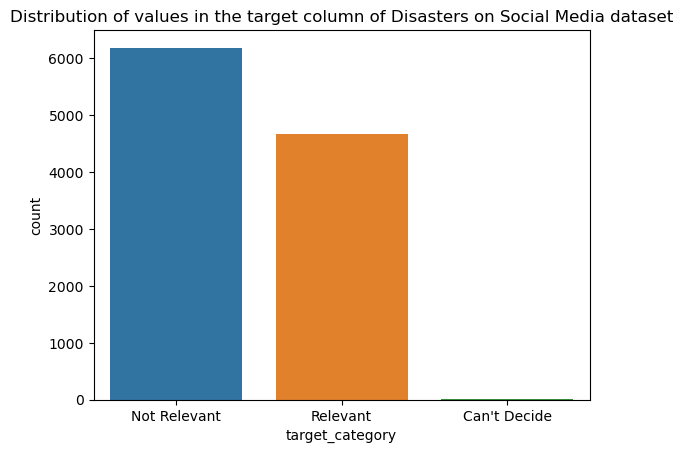

In [36]:
#Plot the values count of target column
sns.barplot(data=target_count_df,x="target_category", y="count")
plt.title("Distribution of values in the target column of Disasters on Social Media dataset");

In [37]:
#Let's convert the categorical values of target column to integer
train2s["target"] = (train2s["target"] == "Relevant").astype("int")
train2s.head()

,keyword,location,text,target
0,0,0,Just happened a terrible car crash,1
1,0,0,Our Deeds are the Reason of this #earthquake M...,1
2,0,0,"Heard about #earthquake is different cities, s...",1
3,0,0,"there is a forest fire at spot pond, geese are...",1
4,0,0,Forest fire near La Ronge Sask. Canada,1


In [38]:
#Count the unique values in the target column
df = train2s["target"].value_counts()
df = pd.DataFrame({"target_value":df.index, "count":df.values})

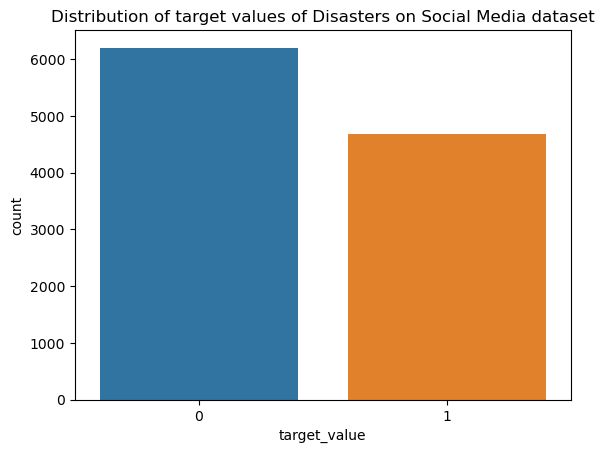

In [39]:
#Plot the values count of target column
sns.barplot(data=df, x="target_value", y="count")
plt.title("Distribution of target values of Disasters on Social Media dataset");

## Data processing

In [40]:
#View the train dataset
train.head(2)

,id,keyword,location,text,target
0,1,0,0,Our Deeds are the Reason of this #earthquake M...,1
1,4,0,0,Forest fire near La Ronge Sask. Canada,1


In [41]:
#View the processed "disaster on Social Media" dataset
train2s.head(2)

,keyword,location,text,target
0,0,0,Just happened a terrible car crash,1
1,0,0,Our Deeds are the Reason of this #earthquake M...,1


In [42]:
#Remove the "id" column form the train DataFrame
train.pop("id")

0           1
1           4
2           5
3           6
4           7
        ...  
7608    10869
7609    10870
7610    10871
7611    10872
7612    10873
Name: id, Length: 7613, dtype: int64

In [43]:
train.head(2)

,keyword,location,text,target
0,0,0,Our Deeds are the Reason of this #earthquake M...,1
1,0,0,Forest fire near La Ronge Sask. Canada,1


In [44]:
#Combine the two datasets
train_dataset = pd.concat([train, train2s])
train_dataset.head()

,keyword,location,text,target
0,0,0,Our Deeds are the Reason of this #earthquake M...,1
1,0,0,Forest fire near La Ronge Sask. Canada,1
2,0,0,All residents asked to 'shelter in place' are ...,1
3,0,0,"13,000 people receive #wildfires evacuation or...",1
4,0,0,Just got sent this photo from Ruby #Alaska as ...,1


In [45]:
#Shape of the combined dataset
train_dataset.shape

(18489, 4)

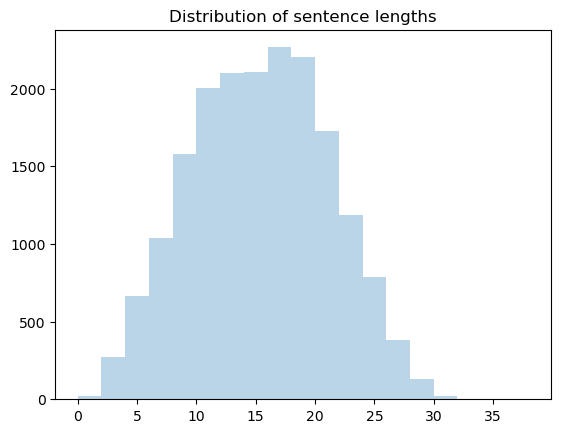

In [46]:
#Use the plot_sentence_lengths to check the distribution og tweet lengths
plot_sentence_lengths(train_dataset)

In [47]:
#Shuffle the DataFrame
train_dataset = shuffle(train_dataset, random_state=SEED)
train_dataset = shuffle(train_dataset, random_state=int(SEED/2))
train_dataset.head()

,keyword,location,text,target
3046,death,0,@Kaay_Paat it's actually death and takes way l...,0
10789,wrecked,Pennsylvania,Four hundred wrecked cars (costing $100 apiece...,0
467,attack,Online 24/7. Not even kidding.,Notley's tactful yet very direct response to H...,1
7480,wreck,0,Ranking #artectura #pop2015 #Nå¼36 Florence + ...,0
6772,lightning,"Greensboro, North Carolina",Heavy rain gusty winds and vivid lightning mov...,1


In [48]:
#Convert train data to tf.data.Dataset object
BATCH = 32
#Concatenate the text data of the columns "keyword", "location", "text"
train_tf = tf.data.Dataset.from_tensor_slices(
    (train_dataset['keyword'] + train_dataset['location'] + train_dataset['text'], train_dataset[TARGET]))

#Convert the data into batch
train_tf = train_tf.shuffle(int((SEED*13)/8)).batch(BATCH)

#Convert test data to tf.data.Dataset object
test_tf = tf.data.Dataset.from_tensor_slices(test['keyword'] + test['location'] + test['text'])

#Convert the data into batch
test_tf = test_tf.batch(BATCH)

## Text Vectorization

To enable the model to process the text data, we need to convert it into integer values through a process called text vectorization.

In [49]:
max_length = 40
max_tokens = 20_000

#Instantiate the TextVectorization layer
text_vectorization = layers.TextVectorization(max_tokens=max_tokens,
                                              output_mode='int',
                                              output_sequence_length=max_length
                                             )

In [50]:
#Learn the vocabulary
text_vectorization.adapt(train_tf.map(lambda twt, target: twt))

In [51]:
#Get the vocabulary
vocab = text_vectorization.get_vocabulary()
print("Vocabulary size =",len(vocab))

#Convert the list object to NumPy array for decoding the vectorized data
vocab = np.array(vocab)

Vocabulary size = 20000


In [52]:
#Vectorize the train dataset
train_tf = train_tf.map(lambda twt, target: (text_vectorization(twt), target),
                   num_parallel_calls=tf.data.AUTOTUNE)

#Vectorize the test dataset
test_tf = test_tf.map(lambda twt: text_vectorization(twt),
                      num_parallel_calls=tf.data.AUTOTUNE)

In [53]:
#Define a function to print the tokenized data
def print_sample(data_obj):
    for sample, traget in data_obj:
        #Print the first item
        print("1st sample:",sample[0].numpy())
        print("\n")
        #Print the second item
        print("2nd sample:",sample[1].numpy())
        print("\n")
        #Print the third item
        print("3rd sample:",sample[2].numpy())
        print("\n")
        break

In [54]:
#Print the tokenized data
print_sample(train_tf)

1st sample: [    1     1   404  7646   112     3  1237   471     4   603   212   603
 13597     1     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]


2nd sample: [    1     1  3129     1  6037    11     2   854    10     2    97    90
   733   387     2   121  2315     1 16461 15976     1     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]


3rd sample: [12031  1672    89  2397    16     1 19786     1     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]




In [55]:
#Print the vectorized tweet and the decoded tweet
for tx in train_tf:
    print("\t\t\t\tVectorized Tweet:\n",tx[0][0])
    print("\n\n\t\t\t\tDecoded Tweet:\n", " ".join(vocab[tx[0][0].numpy()]))
    break

				Vectorized Tweet:
 tf.Tensor(
[10122  5497     8    69   100    15    58  1029   114    38     4     2
   712  5792  1883    15     1    53  2590     3   442    89   248  1017
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0], shape=(40,), dtype=int64)


				Decoded Tweet:
 violent20stormususpacific command i can see it they gave their all in the peace unity festival it [UNK] when freedom a violent storm hit sea                


## Model

To classify the tweets, we will employ a Transformer model specifically designed as an Encoder-only model. In this approach, we will define the Encoder layer and incorporate a Positional Embedding layer using Keras subclassing. By utilizing these components, we aim to enhance the accuracy and effectiveness of our classification model.

Moreover, the Transformer model's architecture enables it to capture contextual relationships and dependencies among words or tokens within the tweets. The Encoder layer acts as a powerful feature extractor, learning representations that contribute to the tweet classification task.

Additionally, the Positional Embedding layer adds crucial positional information to the input tokens, enabling the model to discern the sequential order of words in the tweet. This positional encoding facilitates the Transformer model in capturing long-range dependencies and effectively processing the input text.

By combining the Transformer's robust architecture with Keras subclassing, we can create a powerful and flexible model that yields accurate tweet classification results.

**#We'll registers the custom layer with the Keras serialization framework. So that it can be serialized and deserialized. We'll do so by using the "register_keras_serializable" decorator**

In [56]:
#Clear all previously registered custom objects
keras.saving.get_custom_objects().clear()

In [57]:
#Define a Transformer Encoder using subclassed layer
@tf.keras.utils.register_keras_serializable()
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        #Size of the input vector (size of the vocabulary)
        self.embed_dim = embed_dim
        #Size of the inner dense layer
        self.dense_dim = dense_dim
        #Number of attention heads
        self.num_heads = num_heads

        self.attention = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
                   [layers.Dense(dense_dim, activation="relu"),
                    layers.Dense(embed_dim),]
                                        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.max_pool1 = layers.GlobalMaxPooling1D()

    #Define a call() method  where forward pass is implemented
    def call(self, inputs, mask=None):
        if mask is not None:
            mask = mask[:, tf.newaxis, :]

        #Apply the attention layer
        attention_output = self.attention(inputs, inputs, attention_mask=mask)
        #Normalize the data
        proj_input = self.layernorm_1(inputs + attention_output)
        #Apply the dense layer
        proj_output = self.dense_proj(proj_input)
        #Normalize the data and return it
        return self.layernorm_2(proj_input + proj_output)
        
        #return self.max_pool1(norm)

    #Define configuration method
    def get_config(self):
        config = super().get_config()
        config.update({
                    "embed_dim": self.embed_dim,
                    "num_heads": self.num_heads,
                    "dense_dim": self.dense_dim,
                    })
        return config

In [58]:
# Implementing positional embedding as a subclassed layer
@tf.keras.utils.register_keras_serializable()
class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.sequence_length = sequence_length
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.token_embeddings = layers.Embedding(
          input_dim=input_dim, output_dim=output_dim)
        self.position_embeddings = layers.Embedding(
                   input_dim=sequence_length, output_dim=output_dim)

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
            return tf.math.not_equal(inputs, 0)

    def get_config(self):
        config = super().get_config()
        config.update({
           "output_dim": self.output_dim,
           "sequence_length": self.sequence_length,
           "input_dim": self.input_dim,
                    })
        return config

In [59]:
#Construct the model

#Define the input
inputs = keras.Input(shape=(None,), dtype="int64")

#Apply positional embeddings
pos_embed = PositionalEmbedding(sequence_length=40,
                        input_dim=20_000,
                        output_dim=256)(inputs)

#Apply the encoder
encoded = TransformerEncoder(embed_dim=256,
                             dense_dim=32,
                             num_heads=8)(pos_embed)


x = layers.GlobalMaxPooling1D()(encoded)
x = layers.Dropout(0.5)(x)
output = layers.Dense(units=1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs,outputs=output)

In [60]:
#Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5, beta_1=0.9, beta_2=0.98,epsilon=1e-9),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy']
             )

In [61]:
#Summary of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 positional_embedding (Posit  (None, None, 256)        5130240   
 ionalEmbedding)                                                 
                                                                 
 transformer_encoder (Transf  (None, None, 256)        2121248   
 ormerEncoder)                                                   
                                                                 
 global_max_pooling1d_1 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                             

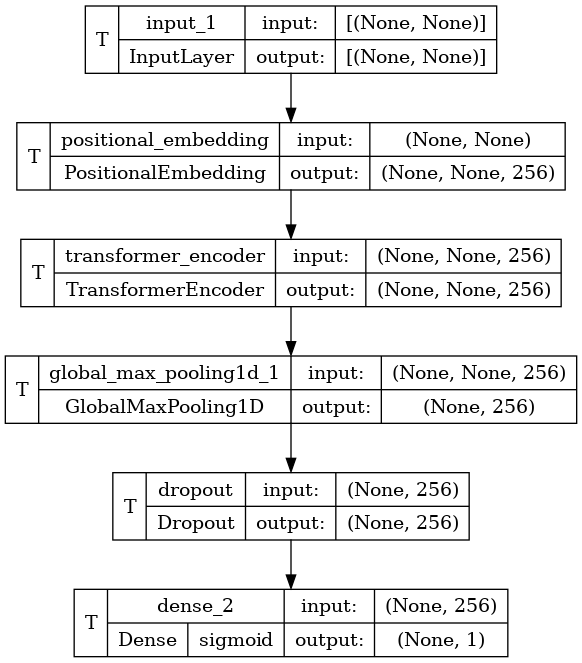

In [62]:
#Plot the model
keras.utils.plot_model(model=model,
                       to_file="model.png",
                       show_shapes=True,
                       show_layer_names=True,
                       expand_nested=True,
                       show_layer_activations=True,
                       show_trainable=True,
        )

In [63]:
#Define callbacks
callbacks = [
       keras.callbacks.ModelCheckpoint("tweets_classifier.keras",
                                       save_best_only=True)
            ]

In [64]:
#Define the validation data size
val_size = int(0.25 * len(train_tf))

In [65]:
# Split the data into training and validation
validation_data = train_tf.take(val_size)
train_data = train_tf.skip(val_size)

In [66]:
#Train the model
history = model.fit(train_data,
                    epochs=150,
                    validation_data=validation_data,
                    callbacks=callbacks)

Epoch 1/150
434/434 [==============================] - 40s 66ms/step - loss: 1.1894 - accuracy: 0.5206 - val_loss: 0.6623 - val_accuracy: 0.6063
Epoch 2/150
434/434 [==============================] - 10s 23ms/step - loss: 0.9925 - accuracy: 0.5487 - val_loss: 0.6091 - val_accuracy: 0.6712
Epoch 3/150
434/434 [==============================] - 9s 20ms/step - loss: 0.7970 - accuracy: 0.5930 - val_loss: 0.5815 - val_accuracy: 0.7079
Epoch 4/150
434/434 [==============================] - 8s 19ms/step - loss: 0.7001 - accuracy: 0.6256 - val_loss: 0.5368 - val_accuracy: 0.7491
Epoch 5/150
434/434 [==============================] - 8s 18ms/step - loss: 0.6066 - accuracy: 0.6821 - val_loss: 0.5029 - val_accuracy: 0.7626
Epoch 6/150
434/434 [==============================] - 8s 17ms/step - loss: 0.5423 - accuracy: 0.7324 - val_loss: 0.4698 - val_accuracy: 0.7839
Epoch 7/150
434/434 [==============================] - 9s 20ms/step - loss: 0.4940 - accuracy: 0.7624 - val_loss: 0.4448 - val_accurac

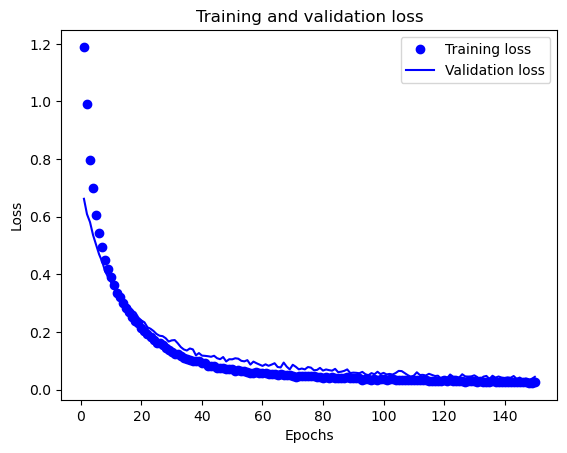

In [67]:
# Plotting the training and validation loss
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

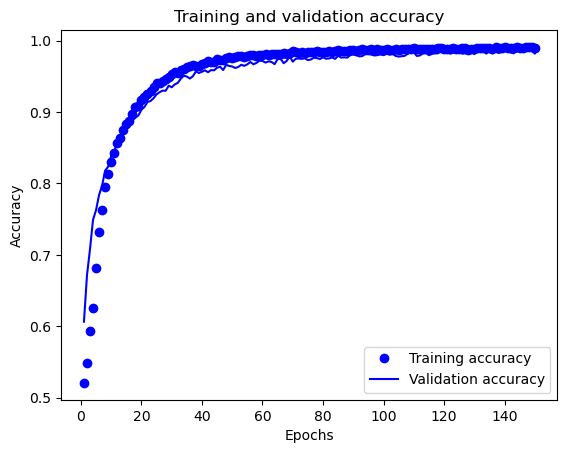

In [68]:
# Plotting the training and validation accuracy
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [69]:
#Classify the tweets of test data
predictions = model.predict(test_tf)

102/102 [==============================] - 1s 7ms/step


In [70]:
#Print the predictions
predictions

array([[0.9999268 ],
       [0.9992913 ],
       [0.99999833],
       ...,
       [0.9999993 ],
       [0.99551183],
       [0.9999987 ]], dtype=float32)

In [71]:
threshold = 0.5
#Convert the float values to binary
final_predictions = [1 if i > threshold else 0 for i in predictions]
final_predictions[:10]

[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]

In [72]:
sample

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [73]:
submissions = pd.DataFrame(columns=["id","target"])
submissions["target"] = final_predictions
submissions["id"] = test.id
submissions

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,0
3259,10865,1
3260,10868,1
3261,10874,1


In [74]:
#Save the file as a csv file
submissions.to_csv("submission.csv", index=False)

**Hitherto, the task is done. The remaining code cells are for saving the necessary metadata for putting model in production**

In [75]:
#Save the vocabulary
np.save("/kaggle/working/vocab",vocab)

In [76]:
"""
Model file has already been saved, so, we don't need to save that again. 
But if you made some changes after training, you can un-comment the following
line to save the model
"""

#tf.keras.saving.save_model(model, filepath="/kaggle/working/updated_model.keras")

"\nModel file has already been saved, so, we don't need to save that again. \nBut if you made some changes after training, you can un-comment the following\nline to save the model\n"